In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CP_ALS3 as cp

In [88]:
%%time
init_shape = (10, 10, 10)
coo, vals, nnz = cp.coo_tensor_gen(init_shape, density=0.02)
assert cp.check_coo_tensor(coo, nnz)!= "Bad"

CPU times: user 83 µs, sys: 2 µs, total: 85 µs
Wall time: 87.5 µs


In [89]:
nnz

20

In [90]:
coo.flags.c_contiguous

False

In [221]:
max_iter = 15
rank = 56
a, b, c, err = cp.cp_als3(coo, vals, nnz, init_shape, rank=rank, max_iter=max_iter)

iterations over


In [222]:
error = cp.sqrt_err(coo, vals, nnz, init_shape, a, b, c)
rerror = cp.sqrt_err_relative(coo, vals, nnz, init_shape, a, b, c)
print(f"Abs err = {error};\nRel err = {rerror};")

Abs err = 0.00010209709090348157;
Rel err = 4.222663310410745e-05;


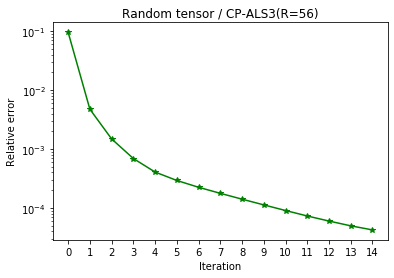

In [224]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'g-*')